# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`

## We'll take over the NotMNIST dataset and use a basic ANN to classify the digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os


In [3]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz

--2020-06-02 17:52:36--  http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247336696 (236M) [application/x-gzip]
Saving to: ‘notMNIST_large.tar.gz’

notMNIST_large.tar. 100%[===================>] 235.88M  94.9MB/s    in 2.5s    

2020-06-02 17:52:38 (94.9 MB/s) - ‘notMNIST_large.tar.gz’ saved [247336696/247336696]

--2020-06-02 17:52:40--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8.1M) [application/x-gzip]
Saving to: ‘notMNIST_small.tar.gz’

notMNIST_small.tar. 100%[===================>]   8.07M  32.8MB/s    in 0.2s    

2020-06-02 17:52:40 (32.8 MB/s) - ‘notMNIST_small.t

In [4]:
!ls 

notMNIST_large.tar.gz  notMNIST_small.tar.gz  sample_data


In [0]:
!tar -xzf notMNIST_large.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [6]:
!ls

notMNIST_large	       notMNIST_small	      sample_data
notMNIST_large.tar.gz  notMNIST_small.tar.gz


In [7]:
!ls notMNIST_large

A  B  C  D  E  F  G  H	I  J


In [8]:
!ls notMNIST_small

A  B  C  D  E  F  G  H	I  J


In [0]:
path = 'notMNIST_large'
path_val = 'notMNIST_small'

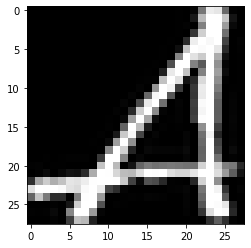

In [10]:
plt.imshow(image.load_img(path + '/A/ZGVhckpvZSBJdGFsaWMudHRm.png'))
plt.show()

In [0]:
IMAGE_SIZE = [28,28]
train_images = glob(path + '/*/*.png')
validation_images = glob(path_val + '/*/*.png')

In [0]:
# Number of classes 
classes = glob(path + '/*')

In [13]:
print(classes)

['notMNIST_large/J', 'notMNIST_large/D', 'notMNIST_large/I', 'notMNIST_large/A', 'notMNIST_large/G', 'notMNIST_large/B', 'notMNIST_large/E', 'notMNIST_large/H', 'notMNIST_large/F', 'notMNIST_large/C']


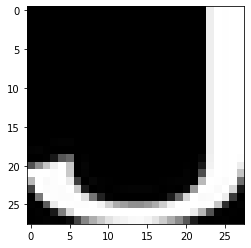

In [14]:
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

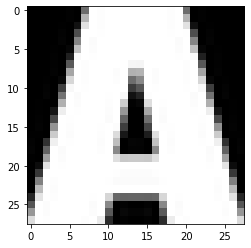

In [15]:
plt.imshow(image.load_img(np.random.choice(validation_images)))
plt.show()

In [0]:
sample = image.load_img(np.random.choice(validation_images))

In [17]:
type(sample)

PIL.Image.Image

In [18]:
sample.size

(28, 28)

In [0]:
Y = len(classes)

In [20]:
Y

10

In [21]:
print(len(train_images))
print(len(validation_images))

529119
18726


In [0]:
batch_size = 254

In [0]:
gen_object = ImageDataGenerator(rescale=1.0/255.0)

In [0]:
I_SIZE = IMAGE_SIZE[0] * IMAGE_SIZE[1]

In [25]:
print(I_SIZE)

784


In [26]:
train_generator = gen_object.flow_from_directory(path, target_size=IMAGE_SIZE, batch_size=1, color_mode="grayscale", shuffle=True)
validation_generator = gen_object.flow_from_directory(path_val, target_size=IMAGE_SIZE, batch_size=1,color_mode="grayscale",  shuffle=True)

Found 529119 images belonging to 10 classes.
Found 18726 images belonging to 10 classes.


In [0]:
N = len(train_images)
N_val = len(validation_images)


In [28]:
train_generator[1][0].shape

(1, 28, 28, 1)

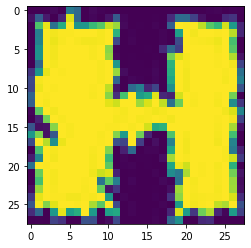

In [29]:
plt.imshow(train_generator[10][0].reshape(28,28))

In [30]:
train_generator[1][1].shape

(1, 10)

In [31]:
len(train_generator)

529119

In [0]:
X_train = np.zeros((N, 28, 28))
y_train = np.zeros((N, Y))

In [33]:
X_train.shape

(529119, 28, 28)

In [0]:
k = 0
while k != N:
  try:
    i = np.random.randint(0, N)
    X_train[k,:] = train_generator[i][0].reshape(28,28)
    y_train[k,:] = train_generator[i][1]
    k+=1
  except:
    pass


In [35]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
X_train[0, 0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.00784314, 0.        ,
       0.17254902, 0.59607846, 0.85490203, 0.96470594, 0.91372555,
       0.4784314 , 0.        , 0.        ])

In [37]:
X_train.shape

(529119, 28, 28)

In [38]:
y_train.shape

(529119, 10)

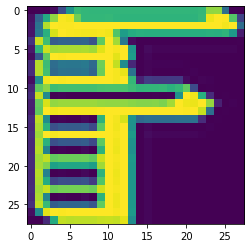

In [39]:
plt.imshow(X_train[10].reshape(28,28))

In [40]:
X_train.shape

(529119, 28, 28)

In [0]:
X_test = np.zeros((N_val, 28, 28))
y_test = np.zeros((N_val, Y))

In [0]:
k = 0
while k != N_val:
  try:
    i = np.random.randint(0, N_val)
    X_test[k,:] = validation_generator[i][0].reshape(28,28)
    y_test[k,:] = validation_generator[i][1]
    k+=1
  except:
    pass


In [43]:
X_test.shape

(18726, 28, 28)

In [44]:
X_train.shape

(529119, 28, 28)

In [45]:
X_test.shape

(18726, 28, 28)

In [46]:
y_train.shape

(529119, 10)

In [47]:
y_test.shape

(18726, 10)

In [0]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [0]:
input_shape = X_train[0].shape

In [50]:
print(input_shape)

(28, 28, 1)


In [0]:
i_layer = Input(shape = input_shape)
h_layer = Conv2D(32, (3,3), strides = 2, activation='relu')(i_layer)
h_layer = Conv2D(64, (3,3), strides = 2, activation='relu')(h_layer)
h_layer = Flatten()(h_layer)
h_layer = Dropout(0.4)(h_layer)
h_layer = Dense(128, activation='relu')(h_layer)
h_layer = Dropout(0.4)(h_layer)
o_layer = Dense(Y, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [52]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [54]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 1)

16535/16535 [==============================] - 229s 14ms/step - loss: 0.4216 - accuracy: 0.8733 - val_loss: 0.1376 - val_accuracy: 0.9619


In [55]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


16535/16535 [==============================] - 63s 4ms/step - loss: 0.2875 - accuracy: 0.9125
Train eval:  [0.287466824054718, 0.9124563932418823]
586/586 [==============================] - 2s 4ms/step - loss: 0.1376 - accuracy: 0.9619
Test eval:  [0.1375988870859146, 0.9619246125221252]


In [0]:
y_pred = model.predict(X_test).argmax(axis=1)

In [63]:
print(y_test.shape)
print(y_pred.shape)

(18726,)
(18726,)


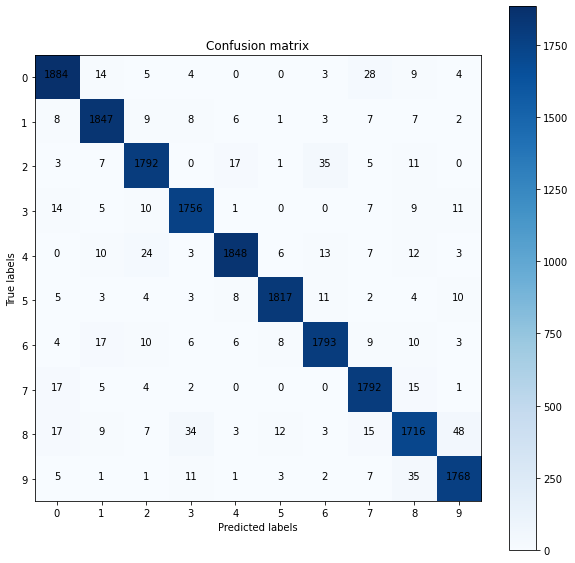

In [65]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i,j], 'd'),
           horizontalalignment = 'center',
           color='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(list(range(10)))
plt.yticks(list(range(10)))
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


In [0]:
labels = "A,B,C,D,E,F,G,H,I,J".split(",")

Text(0.5, 1.0, 'Predicted = A, Real = G')

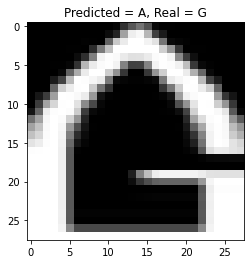

In [68]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))